In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import collections
from datetime import datetime

df = pd.read_csv("dataset/complaint_data.csv")
df_col_desc = pd.read_csv("dataset/column_desc.csv")

# Data cleansing - removing null columns and data points

dropcols = ["Lat_Lon","X_COORD_CD","Y_COORD_CD","CMPLNT_NUM"] # Redundant columns
for i in df.columns:
    if float(df[i].isnull().sum())/len(df)*100 > 20: # if more than 10% data is empty, clip the column
        dropcols.append(i)
df = df.drop(dropcols, axis=1)
df = df[~df.isnull().any(axis=1)]

# Parsing the DateTime column 

df["RPT_DT"] = df["RPT_DT"].apply(lambda x: datetime.strptime(x, '%m/%d/%y')
                                  .strftime('%Y-%m-%d')).astype('datetime64[ns]')
df["CMPLNT_FR_DT"] = df["CMPLNT_FR_DT"].apply(lambda x: datetime.strptime(x, '%m/%d/%y')
                                              .strftime('%Y-%m-%d')).astype('datetime64[ns]')
df["CMPLNT_TO_DT"] = df["CMPLNT_TO_DT"].apply(lambda x: datetime.strptime(x, '%m/%d/%y')
                                              .strftime('%Y-%m-%d')).astype('datetime64[ns]')

df["RPT_DT"] = pd.to_datetime(df["RPT_DT"])
df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"])
df["CMPLNT_TO_DT"] = pd.to_datetime(df["CMPLNT_TO_DT"])

df["FR_TM_CAT"] = df["CMPLNT_FR_TM"].apply(lambda x: int(x.strip().split(':')[0])//6)
df["FR_TM_CAT"] = df["CMPLNT_TO_TM"].apply(lambda x: int(x.strip().split(':')[0])//6)

# Removing outliers

df = df[~(df['CMPLNT_TO_DT'] >= '2017-01-01')]

In [2]:
# Compiling list of Offenses, their categories and key codes

offense_code = {}
offlist = df["OFNS_DESC"].unique()
for each in offlist:
    key = df[df["OFNS_DESC"]==each]["KY_CD"].unique()[0]
    offense_code[key] = each

print "Offense Codes and Description " + str(len(offense_code))
print ""
offense_code = collections.OrderedDict(sorted(offense_code.items()))
for k,v in offense_code.items():
    print k,v
    # OVER ZIPCODE
df_cross_zip = pd.crosstab(df['ZIPCODE'], df['CRM_ATPT_CPTD_CD'])

df_cross_zip['ATTEMPTED'].nlargest(len(df_cross_zip)/10).plot(kind='bar')
plt.show()



# Repeating the same for Police Codes and Descriptions

pd_code = {}
pdlist = df["PD_DESC"].unique()
for each in pdlist:
    key = df[df["PD_DESC"]==each]["PD_CD"].unique()[0]
    pd_code[key] = each

print ""
print "Police Department Codes and Descriptions " + str(len(pd_code))
pd_code = collections.OrderedDict(sorted(pd_code.items()))
for k,v in pd_code.items():
    print k,v

# INFERENCES

# Using only KY_CD, PD_CD for analysis

#df = df.drop(['PD_DESC','OFNS_DESC'], axis=1)

Offense Codes and Description 54

102 HOMICIDE-NEGLIGENT-VEHICLE
103 HOMICIDE-NEGLIGENT,UNCLASSIFIE
105 ROBBERY
106 FELONY ASSAULT
107 BURGLARY
109 GRAND LARCENY
110 GRAND LARCENY OF MOTOR VEHICLE
111 POSSESSION OF STOLEN PROPERTY
112 THEFT-FRAUD
113 FORGERY
114 ARSON
118 DANGEROUS WEAPONS
119 INTOXICATED/IMPAIRED DRIVING
120 ENDAN WELFARE INCOMP
124 KIDNAPPING
125 NYS LAWS-UNCLASSIFIED FELONY
126 MISCELLANEOUS PENAL LAW
230 JOSTLING
231 BURGLAR'S TOOLS
233 SEX CRIMES
235 DANGEROUS DRUGS
237 ESCAPE 3
238 FRAUDULENT ACCOSTING
340 FRAUDS
341 PETIT LARCENY
342 PETIT LARCENY OF MOTOR VEHICLE
343 THEFT OF SERVICES
344 ASSAULT 3 & RELATED OFFENSES
345 OFFENSES RELATED TO CHILDREN
346 ALCOHOLIC BEVERAGE CONTROL LAW
347 INTOXICATED & IMPAIRED DRIVING
348 VEHICLE AND TRAFFIC LAWS
349 DISRUPTION OF A RELIGIOUS SERV
350 GAMBLING
351 CRIMINAL MISCHIEF & RELATED OF
352 CRIMINAL TRESPASS
353 UNAUTHORIZED USE OF A VEHICLE
354 ANTICIPATORY OFFENSES
355 OFFENSES AGAINST THE PERSON
356 PROSTITUTION & RE

In [4]:
# MACHINE LEARNING - GENERATING CATEGORY VARIABLES

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['CRM_ATPT_CPTD_CD'])
df['CRM_CAT'] = le.transform(df['CRM_ATPT_CPTD_CD'])

le = preprocessing.LabelEncoder()
le.fit(df['LAW_CAT_CD'])
df['LAW_CAT'] = le.transform(df['LAW_CAT_CD'])

le = preprocessing.LabelEncoder()
le.fit(df['JURIS_DESC'])
df['JURIS_CAT'] = le.transform(df['JURIS_DESC'])

le = preprocessing.LabelEncoder()
le.fit(df['BORO_NM'])
df['BORO_CAT'] = le.transform(df['BORO_NM'])

le = preprocessing.LabelEncoder()
le.fit(df['PREM_TYP_DESC'])
df['PREM_CAT'] = le.transform(df['PREM_TYP_DESC'])

df['DATE_CAT'] = df['CMPLNT_FR_DT'].map(lambda x: x.month)
df = df.reset_index(drop=True)

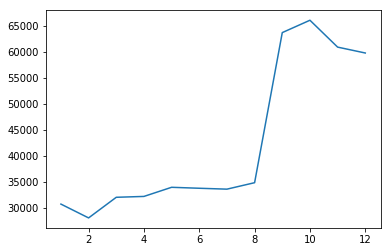

In [5]:
df_tmp = []
for i in np.sort(df['DATE_CAT'].unique()):
    df_tmp.append(len(df[df['DATE_CAT'] == i]))

plt.plot(np.sort(df['DATE_CAT'].unique()), df_tmp, label="number of crimes")
plt.show()


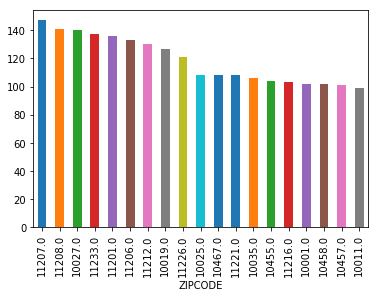

In [6]:
# OVER ZIPCODE
df_cross_zip = pd.crosstab(df['ZIPCODE'], df['CRM_ATPT_CPTD_CD'])

df_cross_zip['ATTEMPTED'].nlargest(len(df_cross_zip)/10).plot(kind='bar')
plt.show()

In [ ]:
# OVER PRECINCT
df_cross_pre = pd.crosstab(df['ADDR_PCT_CD'], df['CRM_ATPT_CPTD_CD'])

df_cross_pre['ATTEMPTED'].nlargest(len(df_cross_pre)/10).plot(kind='bar')
plt.show()